In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('tested.csv')

# Display the number of missing values before imputation
print("Number of missing values before imputation:")
print(df.isnull().sum())

Matplotlib is building the font cache; this may take a moment.


Number of missing values before imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [2]:
imputer = SimpleImputer(strategy='mean')

# Perform imputation on the 'Age' column
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1, 1))

# Display the number of missing values after imputation
print("\nNumber of missing values after imputation:")
print(df.isnull().sum())


Number of missing values after imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [3]:
# Convert categorical data to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Encode categorical variables
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Cabin'] = le.fit_transform(df['Cabin'].astype(str))

# Handle missing values in the rest of the columns
df = df.fillna(df.mean())

# Display the dataframe after handling missing values and converting categorical variables to numerical
print("\nDataframe after handling missing values and converting categorical variables to numerical:")
print(df.head())


Dataframe after handling missing values and converting categorical variables to numerical:
   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0          892         0       3   206    0  34.5      0      0     152   
1          893         1       3   403    1  47.0      1      0     221   
2          894         0       2   269    0  62.0      0      0      73   
3          895         0       3   408    0  27.0      0      0     147   
4          896         1       3   178    1  22.0      1      1     138   

      Fare  Cabin  Embarked  
0   7.8292     76         2  
1   7.0000     76         0  
2   9.6875     76         2  
3   8.6625     76         0  
4  12.2875     76         0  


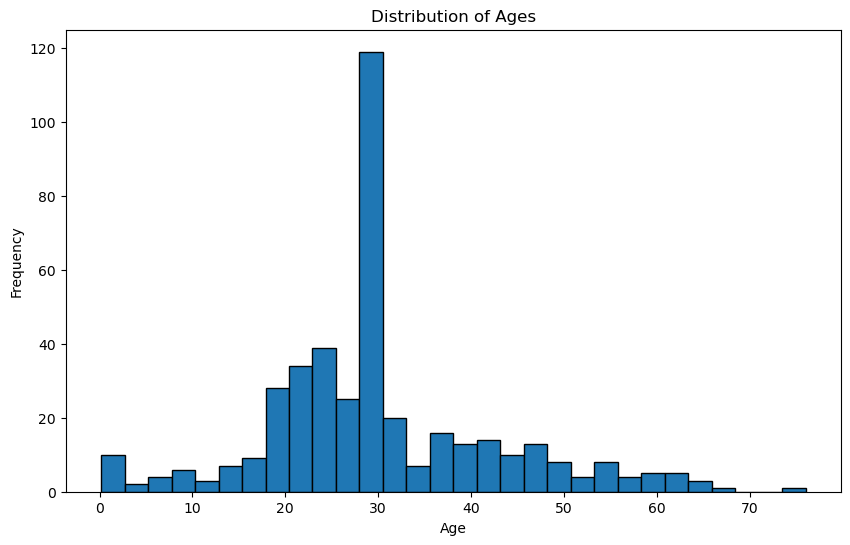

In [4]:
# Plot the distribution of ages
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Split the data into features and target label
X = df.drop('Survived', axis=1)
y = df['Survived']
print(X, y)

     PassengerId  Pclass  Name  Sex       Age  SibSp  Parch  Ticket      Fare  \
0            892       3   206    0  34.50000      0      0     152    7.8292   
1            893       3   403    1  47.00000      1      0     221    7.0000   
2            894       2   269    0  62.00000      0      0      73    9.6875   
3            895       3   408    0  27.00000      0      0     147    8.6625   
4            896       3   178    1  22.00000      1      1     138   12.2875   
..           ...     ...   ...  ...       ...    ...    ...     ...       ...   
413         1305       3   353    0  30.27259      0      0     267    8.0500   
414         1306       1   283    1  39.00000      0      0     324  108.9000   
415         1307       3   332    0  38.50000      0      0     346    7.2500   
416         1308       3   384    0  30.27259      0      0     220    8.0500   
417         1309       3   302    0  30.27259      1      1     105   22.3583   

     Cabin  Embarked  
0   

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)

In [10]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [13]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [14]:
# Print the accuracy
print(f"\nThe accuracy of the model is {accuracy * 100}%.")


The accuracy of the model is 100.0%.
